In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv("./data/house_data.csv")
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,2170,1951
2,180000.0,2,1.00,770,10000,1.0,770,1933
3,604000.0,4,3.00,1960,5000,1.0,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,1680,1987


In [3]:
print(dataset.shape)

(21575, 8)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21575 non-null  float64
 1   bedrooms     21575 non-null  int64  
 2   bathrooms    21575 non-null  float64
 3   sqft_living  21575 non-null  int64  
 4   sqft_lot     21575 non-null  int64  
 5   floors       21575 non-null  float64
 6   sqft_above   21575 non-null  int64  
 7   yr_built     21575 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [5]:
dataset['price'].describe()

count    2.157500e+04
mean     5.383716e+05
std      3.642894e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.412250e+05
max      7.700000e+06
Name: price, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import seaborn as sns

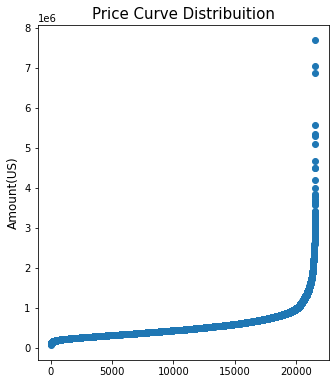

In [7]:
plt.figure(figsize = (12, 6))
plt.subplot(122)
g1 = plt.scatter(range(dataset.shape[0]), np.sort(dataset.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

D:\softwares\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_built', ylabel='Density'>

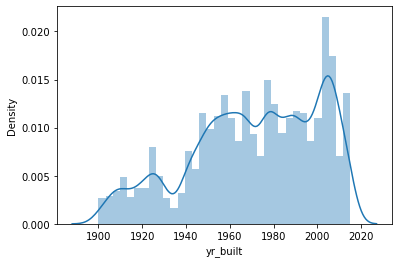

In [8]:
sns.distplot(dataset['yr_built'])

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Feature and Target
feature = dataset.drop(['price'], axis=1)
feature.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,3,1.00,1180,5650,1.0,1180,1955
1,3,2.25,2570,7242,2.0,2170,1951
2,2,1.00,770,10000,1.0,770,1933
3,4,3.00,1960,5000,1.0,1050,1965
4,3,2.00,1680,8080,1.0,1680,1987


In [11]:
target = dataset['price']
target.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [12]:
X = feature
y=target

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [14]:
#random forest regressor
RF_model = RandomForestRegressor()
RF_model.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
RF_predict = RF_model.predict(x_test)

In [16]:
metrics.r2_score(y_test,RF_predict)

0.6146316110357133

In [17]:
#linear regression
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [18]:
reg_predict = reg_model.predict(x_test)
metrics.r2_score(y_test,reg_predict)

0.5655805111078686

In [19]:
param = {'n_estimators':[i*100 for i in range(1,13)],
 'max_depth': list(np.linspace(5, 1200, 10, dtype = int)) + [None],
 'max_features': ['auto', 'sqrt','log2', None],
 'min_samples_leaf': [4, 6, 8, 12],
 'min_samples_split': [3, 7, 10, 14],
 'bootstrap':[True, False]
 }

In [20]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
clr = RandomForestRegressor()
RFR_model = RandomizedSearchCV(estimator = clr, param_distributions = param, 
 cv = 4, verbose= 5, random_state= 3, n_jobs = -1)
RFR_model.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 137, 270, 403, 536,
                                                      668, 801, 934, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [3, 7, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=3, verbose=5)

In [21]:
RFR_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 1067,
 'bootstrap': True}

In [22]:
RFR_model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 137, 270, 403, 536,
                                                      668, 801, 934, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [3, 7, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=3, verbose=5)

In [23]:
RFR_model_predict = RFR_model.predict(x_test)
metrics.r2_score(y_test,RFR_model_predict)

0.6248573292515212

In [24]:
grid_search = GridSearchCV(estimator = clr, param_grid = param, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 16896 candidates, totalling 50688 fits


In [ ]:
grid_predict = grid_search.predict(x_test)

In [ ]:
metrics.r2_score(y_test,grid_predict)